In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce


In [3]:
df = pd.read_excel("data/Muesli Project raw data.xlsx")

In [ ]:
# read all the worksheets form the data excel file
df = pd.read_excel('data/Muesli Project raw data.xlsx', header=1)
df1 = pd.read_excel('data/Muesli Project raw data.xlsx',sheet_name=1)
df2 = pd.read_excel('data/Muesli Project raw data.xlsx',sheet_name=2)
df3 = pd.read_excel('data/Muesli Project raw data.xlsx',sheet_name=3)

In [ ]:
# check the df headers
print(df.columns)
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['Index', 'Order ID', 'Order Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Origin Channel', 'Country/Region', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub-Category', 'Product ID',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
Index(['Order ID', 'Arrival Scan Date', 'Customer Name'], dtype='object')
Index(['Row ID', 'Order ID', 'Order Date', 'On Truck Scan Date', 'Ship Mode'], dtype='object')
Index(['Order ID', 'Ready to Ship Date', 'Pickup Date'], dtype='object')


In [ ]:
# delete unneeded columns
df = df.drop(['Index','Origin Channel', 'Category', 'Sub-Category'], axis=1)
df1 = df1.drop(['Customer Name'], axis=1)
df2 = df2.drop(['Row ID', 'Order Date'], axis=1)

In [ ]:
# check the number of rows and columns
print('df=',df.shape)
print('df1=',df1.shape)
print('df2=',df2.shape)
print('df3=',df3.shape)

df= (9994, 15)
df1= (333, 2)
df2= (5899, 3)
df3= (290, 3)


In [ ]:
# check for duplicates
print('df=',df.duplicated().value_counts())
print('-' * 30)
print('df1=',df1.duplicated().value_counts())
print('-' * 30)
print('df2=',df2.duplicated().value_counts())
print('-' * 30)
print('df3=',df3.duplicated().value_counts())

df= False    9993
True        1
Name: count, dtype: int64
------------------------------
df1= False    333
Name: count, dtype: int64
------------------------------
df2= False    3003
True     2896
Name: count, dtype: int64
------------------------------
df3= False    204
True      86
Name: count, dtype: int64


In [ ]:
# drop the duplicates
df_no_dups = df.drop_duplicates()
df2_no_dups = df2.drop_duplicates()
df3_no_dups = df3.drop_duplicates()

In [ ]:
# check the number of rows and columns
print('df_no_dups=', df_no_dups.shape)
print('df1=', df1.shape)
print('df2_no_dups=', df2_no_dups.shape)
print('df3_no_dups=', df3_no_dups.shape)

df_no_dups= (9993, 15)
df1= (333, 2)
df2_no_dups= (3003, 3)
df3_no_dups= (204, 3)


In [ ]:
# check the df headers and decide what to merge with what
print(df_no_dups.columns)
print(df1.columns)
print(df2_no_dups.columns)
print(df3_no_dups.columns)

Index(['Order ID', 'Order Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Country/Region', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
Index(['Order ID', 'Arrival Scan Date'], dtype='object')
Index(['Order ID', 'On Truck Scan Date', 'Ship Mode'], dtype='object')
Index(['Order ID', 'Ready to Ship Date', 'Pickup Date'], dtype='object')


We have to calculate and validate the company assumptions:
1. Preparation process duration from order reception to shipping (2 days): 'Order Date' - 'Ready to Ship Day' (merge df and df3)
2. Duration of process from "Ready to Ship" to "on Truck" (1 day for normal, 0 days for express): merge df2 and df3
3. Efficacy of "Express Processing": the order ought to be on the truck on the ready to ship day
4. From "On Truck Scan" to "Arrival Scan Date"

...and get image of the whole delivery process duration: from 'Order Date' to 'Arrival Scan Date' (merge df and df2)



1. preparation process duration verification

In [ ]:
# merge df and df3

df_prep_dur_ver = pd.merge(df_no_dups, df3_no_dups, on='Order ID', how='inner')

In [ ]:
# verify the headers of the merged dataframe

df_prep_dur_ver.columns

In [ ]:
# delete unneeded columns

df_prep_dur_ver = df_prep_dur_ver.drop(['Ship Mode', 'Country/Region', 'City', 'State', 
                                        'Postal Code', 'Region', 'Product ID', 
                                        'Sales', 'Quantity', 'Discount', 'Profit'], axis=1)

In [ ]:
# verify

df_prep_dur_ver.sample(10)

,Order ID,Order Date,Customer ID,Customer Name,Ready to Ship Date,Pickup Date
41,US-2020-114657,2020-11-16,MH-18115,Mick Hernandez,2020-11-23,2020-11-25
11,CA-2020-152912,2020-11-09,BM-11650,Brian Moss,2020-11-12,2020-11-13
92,CA-2020-110842,2020-11-11,GA-14725,Guy Armstrong,2020-11-16,2020-11-18
208,US-2020-163790,2020-11-02,NL-18310,Nancy Lomonaco,2020-11-04,2020-11-06
110,US-2020-153948,2020-11-06,FM-14290,Frank Merwin,2020-11-06,2020-11-06
279,CA-2019-165918,2019-09-10,BD-11770,Bryan Davis,2019-09-16,2019-09-18
23,CA-2020-107174,2020-11-06,AB-10060,Adam Bellavance,2020-11-13,2020-11-16
185,US-2020-118157,2020-11-14,AW-10930,Arthur Wiediger,2020-11-19,2020-11-20
96,CA-2020-125290,2020-11-06,CC-12430,Chuck Clark,2020-11-10,2020-11-12
51,US-2020-124926,2020-11-13,ME-17320,Maria Etezadi,2020-11-18,2020-11-20


In [14]:

# Get the weekday name from the date column
df_prep_dur_ver['Weekday'] = df_prep_dur_ver['Order Date'].dt.day_name()

# Print the DataFrame with the weekday column
df_prep_dur_ver


,Order ID,Order Date,Customer ID,Customer Name,Ready to Ship Date,Pickup Date,Weekday
0,CA-2020-119004,2020-11-23,JM-15250,Janet Martin,2020-11-30,2020-12-02,Monday
1,CA-2020-119004,2020-11-23,JM-15250,Janet Martin,2020-11-30,2020-12-02,Monday
2,CA-2020-119004,2020-11-23,JM-15250,Janet Martin,2020-11-30,2020-12-02,Monday
3,CA-2019-145625,2019-09-11,KC-16540,Kelly Collister,2019-09-17,2019-09-18,Wednesday
4,CA-2019-145625,2019-09-11,KC-16540,Kelly Collister,2019-09-17,2019-09-18,Wednesday
...,...,...,...,...,...,...,...
413,CA-2020-152142,2020-11-14,LW-16990,Lindsay Williams,2020-11-16,2020-11-18,Saturday
414,US-2019-134488,2019-09-24,PK-19075,Pete Kriz,2019-10-01,2019-10-02,Tuesday
415,CA-2020-103499,2020-11-20,ES-14020,Erica Smith,2020-11-24,2020-11-25,Friday
416,US-2020-165456,2020-11-30,TB-21625,Trudy Brown,2020-12-03,2020-12-04,Monday


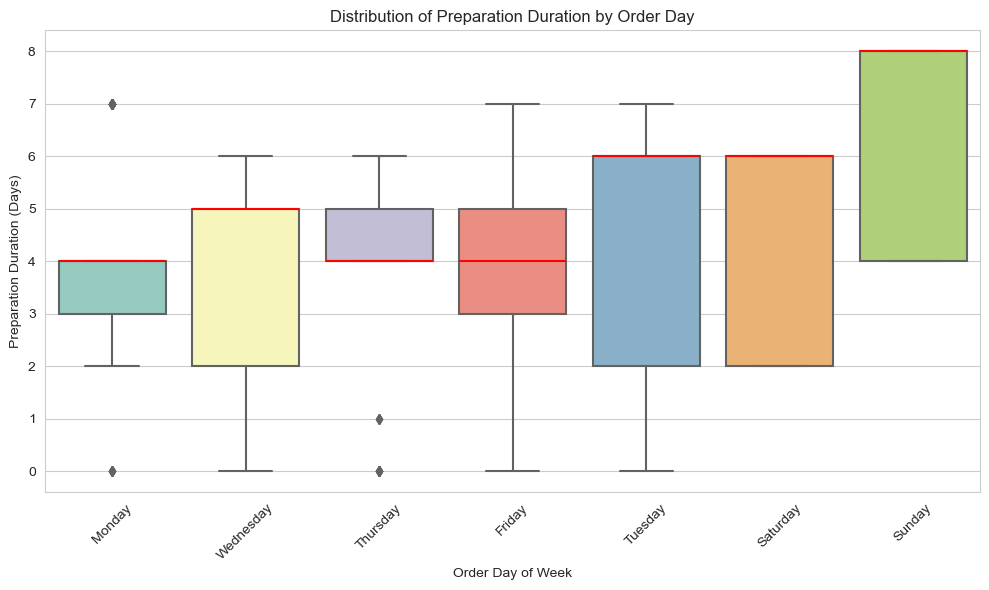

In [15]:
# Convert the date columns to datetime format
df_prep_dur_ver['Order Date'] = pd.to_datetime(df_prep_dur_ver['Order Date'])
df_prep_dur_ver['Ready to Ship Date'] = pd.to_datetime(df_prep_dur_ver['Ready to Ship Date'])
df_prep_dur_ver['Pickup Date'] = pd.to_datetime(df_prep_dur_ver['Pickup Date'])

# Calculate the preparation duration for each order
df_prep_dur_ver['Prep Duration'] = (df_prep_dur_ver['Ready to Ship Date'] - df_prep_dur_ver['Order Date']).dt.days

# Setting up Seaborn style
sns.set_style("whitegrid")

# Plotting the data as boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_prep_dur_ver['Order Date'].dt.day_name(), y='Prep Duration', data=df_prep_dur_ver, palette='Set3',
            medianprops=dict(color='red'))
plt.title('Distribution of Preparation Duration by Order Day')
plt.xlabel('Order Day of Week')
plt.ylabel('Preparation Duration (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# check the type of data in the columns

df_prep_dur_ver.dtypes

In [ ]:
# calculate the preparation duration and print it in a new column

df_prep_dur_ver['prep duration'] = df_prep_dur_ver['Ready to Ship Date']-df_prep_dur_ver['Order Date']

In [ ]:
# verify

df_prep_dur_ver.sample(10)

,Order ID,Order Date,Customer ID,Customer Name,Ready to Ship Date,Pickup Date,prep duration
346,CA-2020-113873,2020-11-13,KE-16420,Katrina Edelman,2020-11-19,2020-11-20,6 days
5,US-2020-132444,2020-11-18,CD-12280,Christina DeMoss,2020-11-23,2020-11-23,5 days
134,US-2020-125808,2020-11-12,EP-13915,Emily Phan,2020-11-16,2020-11-18,4 days
51,US-2020-124926,2020-11-13,ME-17320,Maria Etezadi,2020-11-18,2020-11-20,5 days
218,CA-2019-144764,2019-09-02,RL-19615,Rob Lucas,2019-09-09,2019-09-11,7 days
132,CA-2020-102925,2020-11-05,CD-12280,Christina DeMoss,2020-11-10,2020-11-12,5 days
361,CA-2020-107874,2020-11-21,SW-20275,Scott Williamson,2020-11-27,2020-11-30,6 days
72,CA-2019-144764,2019-09-02,RL-19615,Rob Lucas,2019-09-09,2019-09-11,7 days
91,CA-2019-155187,2019-09-24,LA-16780,Laura Armstrong,2019-09-26,2019-09-27,2 days
30,US-2020-122672,2020-11-04,HG-14965,Henry Goldwyn,2020-11-09,2020-11-12,5 days


In [53]:
df_prep_dur_ver['prep duration'].unique()

<TimedeltaArray>
['7 days', '6 days', '1 days', '3 days', '5 days', '2 days', '0 days',
 '4 days', '8 days']
Length: 9, dtype: timedelta64[ns]

In [60]:
#mydays = pd.DatetimeIndex(df_prep_dur_ver['prep duration']).to_timestamp()

df_prep_dur_ver['weekday'] = df_prep_dur_ver['Order Date'].dt.day_name()
df_prep_dur_ver['weekday'].head()

0       Monday
1    Wednesday
2     Thursday
3       Friday
4      Tuesday
Name: weekday, dtype: object

In [61]:
df_prep_dur_ver.head()

,Order ID,Order Date,Customer ID,Customer Name,Ready to Ship Date,Pickup Date,prep duration,weekday
0,CA-2020-119004,2020-11-23,JM-15250,Janet Martin,2020-11-30,2020-12-02,7 days,Monday
1,CA-2019-145625,2019-09-11,KC-16540,Kelly Collister,2019-09-17,2019-09-18,6 days,Wednesday
2,CA-2020-135307,2020-11-26,LS-17245,Lynn Smith,2020-11-27,2020-11-27,1 days,Thursday
3,CA-2019-102981,2019-09-06,MO-17500,Mary O'Rourke,2019-09-09,2019-09-11,3 days,Friday
4,US-2020-155425,2020-11-10,AB-10600,Ann Blume,2020-11-11,2020-11-12,1 days,Tuesday


In [64]:
#plt.subplots(figsize = (8,6))

sns.boxplot(y = 'prep duration', x = 'body_mass_g', 
            order = ['Biscoe', 'Torgersen', 'Dream'],
            hue = 'weekday',
            data=penguins
           );

AttributeError: 'str' object has no attribute 'get'

In [ ]:
# check the data type

df_prep_dur_ver['prep duration'].dtype

what?...

dtype('<m8[ns]') indicates that the data type of the object is a datetime64, representing date and time information with nanosecond precision.

ok, now I get it!

In [ ]:
# calculate the mean prep duration
mean_duration_days = df_prep_dur_ver['prep duration'].mean()

# Round the mean duration to the nearest days and hours
rounded_duration = mean_duration_days.round('h')  # Round to the nearest hour

# Convert the rounded duration to days and hours
rounded_days = rounded_duration.days
rounded_hours = rounded_duration.seconds // 3600  # Convert seconds to hours

print(f"{rounded_days} days {rounded_hours} hours")

4 days 4 hours


that's way more than the 2 days claimed preparation duration!

2. Duration of process from "Ready to Ship" to "on Truck" (1 day for normal, 0 days for express): merge df2 and df3


In [ ]:
# merge df2 and df3

df_dur_readytoship_truck = pd.merge(df2_no_dups, df3_no_dups, on='Order ID', how='inner')

In [ ]:
# verify the merged dataframe

df_dur_readytoship_truck.sample(10)

,Order ID,On Truck Scan Date,Ship Mode,Ready to Ship Date,Pickup Date
117,CA-2020-149944,2020-11-18,Standard Processing,2020-11-16,2020-11-18
63,CA-2019-106243,2019-10-07,Standard Processing,2019-10-04,2019-10-07
91,CA-2020-100622,2020-11-12,Standard Processing,2020-11-09,2020-11-12
154,CA-2020-137505,2020-11-25,Express,2020-11-24,2020-11-25
156,CA-2020-120404,2020-11-25,Standard Processing,2020-11-24,2020-11-25
201,CA-2020-119305,2020-12-07,Standard Processing,2020-12-04,2020-12-07
193,CA-2020-165029,2020-12-02,Standard Processing,2020-11-30,2020-12-02
142,CA-2020-133620,2020-11-20,Standard Processing,2020-11-18,2020-11-20
96,CA-2020-152737,2020-11-12,Standard Processing,2020-11-09,2020-11-12
74,CA-2020-153339,2020-11-06,Standard Processing,2020-11-05,2020-11-06


In [ ]:
# calculate the duration of the process from "Ready to Ship" to "on Truck"  and print it in a new column

df_dur_readytoship_truck['ship to truck'] = df_dur_readytoship_truck['On Truck Scan Date']-df_dur_readytoship_truck['Ready to Ship Date']

In [ ]:
# verify

df_dur_readytoship_truck.sample(10)

,Order ID,On Truck Scan Date,Ship Mode,Ready to Ship Date,Pickup Date,ship to truck
181,CA-2020-155159,2020-12-02,Standard Processing,2020-11-30,2020-12-02,2 days
146,CA-2020-131254,2020-11-23,Express,2020-11-23,2020-11-23,0 days
153,CA-2020-162250,2020-11-25,Express,2020-11-24,2020-11-25,1 days
137,US-2020-153633,2020-11-20,Standard Processing,2020-11-18,2020-11-20,2 days
76,CA-2020-154732,2020-11-09,Express,2020-11-09,2020-11-09,0 days
83,CA-2020-102925,2020-11-12,Standard Processing,2020-11-10,2020-11-12,2 days
45,CA-2019-130267,2019-09-25,Standard Processing,2019-09-23,2019-09-25,2 days
187,US-2020-128118,2020-12-02,Standard Processing,2020-12-01,2020-12-02,1 days
177,CA-2020-105130,2020-11-30,Standard Processing,2020-11-27,2020-11-30,3 days
18,CA-2019-169971,2019-09-11,Standard Processing,2019-09-09,2019-09-11,2 days


In [55]:
# Get the weekday name from the date column
df_dur_readytoship_truck['Weekday'] = df_dur_readytoship_truck['On Truck Scan Date'].dt.day_name()

# Print the DataFrame with the weekday column
df_dur_readytoship_truck

,Order ID,On Truck Scan Date,Ship Mode,Ready to Ship Date,Pickup Date,ship to truck,Weekday
0,CA-2019-116540,2019-09-03,Express,2019-09-02,2019-09-03,1 days,Tuesday
1,CA-2019-129847,2019-09-04,Express,2019-09-04,2019-09-04,0 days,Wednesday
2,CA-2019-129630,2019-09-04,Express,2019-09-04,2019-09-04,0 days,Wednesday
3,CA-2019-158099,2019-09-06,Express,2019-09-05,2019-09-06,1 days,Friday
4,CA-2019-132143,2019-09-06,Express,2019-09-05,2019-09-06,1 days,Friday
...,...,...,...,...,...,...,...
199,CA-2020-159506,2020-12-04,Standard Processing,2020-12-02,2020-12-04,2 days,Friday
200,US-2020-110576,2020-12-07,Standard Processing,2020-12-04,2020-12-07,3 days,Monday
201,CA-2020-119305,2020-12-07,Standard Processing,2020-12-04,2020-12-07,3 days,Monday
202,CA-2020-105333,2020-12-07,Standard Processing,2020-12-04,2020-12-07,3 days,Monday


/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 69.9% of the po

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 60.4% of the points cannot be placed; you may want to decrease the size of the markers or use strip

<Figure size 700x400 with 0 Axes>

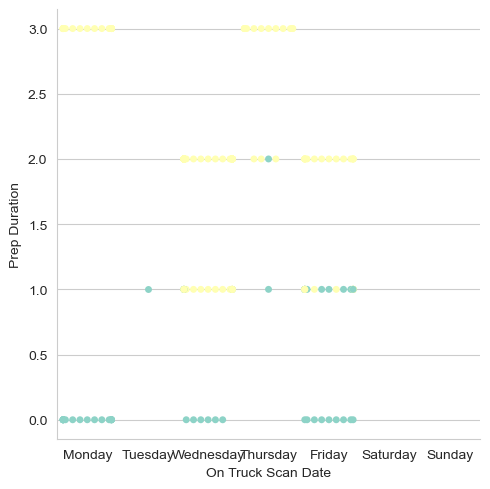

In [68]:
# Convert the date columns to datetime format
df_dur_readytoship_truck['On Truck Scan Date'] = pd.to_datetime(df_dur_readytoship_truck['On Truck Scan Date'])
df_dur_readytoship_truck['Ready to Ship Date'] = pd.to_datetime(df_dur_readytoship_truck['Ready to Ship Date'])
df_dur_readytoship_truck['Pickup Date'] = pd.to_datetime(df_dur_readytoship_truck['Pickup Date'])

# Calculate the preparation duration for each order
df_dur_readytoship_truck['Prep Duration'] = (df_dur_readytoship_truck['On Truck Scan Date'] - df_dur_readytoship_truck['Ready to Ship Date']).dt.days

# Setting up Seaborn style
sns.set_style("whitegrid")
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Plotting the data as boxplots
plt.figure(figsize=(7, 4))
sns.catplot(kind='swarm', x=df_dur_readytoship_truck['On Truck Scan Date'].dt.day_name(), y='Prep Duration', data=df_dur_readytoship_truck,hue='Ship Mode', palette='Set3',
             order=weekday_order)
plt.title('Distribution of Preparation Duration by Order Day')
plt.xlabel('Order Day of Week')
plt.ylabel('Preparation Duration (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_dur_readytoship_truck['ship to truck'].unique()

In [ ]:
# check the type of data in the columns

df_dur_readytoship_truck.dtypes

In [ ]:
# filter for the standard processing

df_dur_readytoship_truck_standard = df_dur_readytoship_truck[df_dur_readytoship_truck['Ship Mode']== 'Standard Processing']

In [ ]:
# verify

df_dur_readytoship_truck_standard.sample(10)

,Order ID,On Truck Scan Date,Ship Mode,Ready to Ship Date,Pickup Date,ship to truck
155,CA-2020-104864,2020-11-25,Standard Processing,2020-11-23,2020-11-25,2 days
32,US-2019-118780,2019-09-18,Standard Processing,2019-09-16,2019-09-18,2 days
96,CA-2020-152737,2020-11-12,Standard Processing,2020-11-09,2020-11-12,3 days
24,CA-2019-164350,2019-09-13,Standard Processing,2019-09-12,2019-09-13,1 days
36,CA-2019-145625,2019-09-18,Standard Processing,2019-09-17,2019-09-18,1 days
71,CA-2020-104136,2020-11-06,Standard Processing,2020-11-05,2020-11-06,1 days
95,CA-2020-157196,2020-11-12,Standard Processing,2020-11-09,2020-11-12,3 days
83,CA-2020-102925,2020-11-12,Standard Processing,2020-11-10,2020-11-12,2 days
33,CA-2019-146206,2019-09-18,Standard Processing,2019-09-16,2019-09-18,2 days
129,CA-2020-164364,2020-11-18,Standard Processing,2020-11-16,2020-11-18,2 days


In [ ]:
# calculate the mean prep duration for the standard processing
mean_to_truck_days_standard = df_dur_readytoship_truck_standard['ship to truck'].mean()

# Round the mean duration to the nearest days and hours
rounded_to_truck_dur_standard = mean_to_truck_days_standard.round('h')  # Round to the nearest hour

# Convert the rounded duration to days and hours
rounded_to_truck_days_standard = rounded_to_truck_dur_standard.days
rounded_to_truck_hours_standard = rounded_to_truck_dur_standard.seconds // 3600  # Convert seconds to hours

print(f"{rounded_to_truck_days_standard} days {rounded_to_truck_hours_standard} hours")

2 days 0 hours


...that's more than the claimed one day

3. Efficacy of "Express Processing": the order ought to be on the truck on the ready to ship day


In [ ]:
# filter for the express processing

df_dur_readytoship_truck_xpress = df_dur_readytoship_truck[df_dur_readytoship_truck['Ship Mode']== 'Express']

In [ ]:
# verify

df_dur_readytoship_truck_xpress.sample(10)

,Order ID,On Truck Scan Date,Ship Mode,Ready to Ship Date,Pickup Date,ship to truck
3,CA-2019-158099,2019-09-06,Express,2019-09-05,2019-09-06,1 days
4,CA-2019-132143,2019-09-06,Express,2019-09-05,2019-09-06,1 days
42,US-2019-147340,2019-09-25,Express,2019-09-24,2019-09-25,1 days
134,CA-2020-121468,2020-11-20,Express,2020-11-20,2020-11-20,0 days
5,US-2019-101616,2019-09-06,Express,2019-09-06,2019-09-06,0 days
105,CA-2020-115448,2020-11-16,Express,2020-11-16,2020-11-16,0 days
2,CA-2019-129630,2019-09-04,Express,2019-09-04,2019-09-04,0 days
67,CA-2020-167227,2020-11-06,Express,2020-11-05,2020-11-06,1 days
153,CA-2020-162250,2020-11-25,Express,2020-11-24,2020-11-25,1 days
81,CA-2020-162096,2020-11-12,Express,2020-11-10,2020-11-12,2 days


In [ ]:
# calculate the mean prep duration for the express processing
mean_to_truck_days_xpress = df_dur_readytoship_truck_xpress['ship to truck'].mean()

# Round the mean duration to the nearest days and hours
rounded_to_truck_dur_xpress = mean_to_truck_days_xpress.round('h')  # Round to the nearest hour

# Convert the rounded duration to days and hours
rounded_to_truck_days_xpress = rounded_to_truck_dur_xpress.days
rounded_to_truck_hours_xpress = rounded_to_truck_dur_xpress.seconds // 3600  # Convert seconds to hours

print(f"{rounded_to_truck_days_xpress} days {rounded_to_truck_hours_xpress} hours")

0 days 10 hours


no comments

4a. From "On Truck Scan" to "Arrival Scan Date"


In [ ]:
# merge df1 and df2

df_order_del_time = pd.merge(df2_no_dups, df1, on='Order ID', how='inner')

In [ ]:
# verify

df_order_del_time.sample(10)

,Order ID,On Truck Scan Date,Ship Mode,Arrival Scan Date
105,CA-2019-137673,2019-09-11,Standard Processing,2019-09-16
301,CA-2020-124114,2020-03-02,Express,2020-03-06
74,CA-2019-153682,2019-06-03,Express,2019-06-06
302,CA-2020-125878,2020-03-04,Standard Processing,2020-03-09
190,CA-2019-152632,2019-11-06,Standard Processing,2019-11-11
197,CA-2019-105494,2019-11-13,Express,2019-11-19
187,CA-2019-143441,2019-11-06,Express,2019-11-11
0,CA-2019-138933,2019-04-29,Express,2019-05-03
291,CA-2020-117870,2020-01-31,Standard Processing,2020-02-06
60,CA-2019-157245,2019-05-29,Standard Processing,2019-06-03


In [ ]:
df_order_del_time['delivery time']=df_order_del_time['Arrival Scan Date']- df_order_del_time['On Truck Scan Date']

In [ ]:
# verify
df_order_del_time.sample(10)

,Order ID,On Truck Scan Date,Ship Mode,Arrival Scan Date,delivery time
276,CA-2019-101168,2020-01-03,Standard Processing,2020-01-07,4 days
23,CA-2019-104311,2019-05-08,Standard Processing,2019-05-13,5 days
322,CA-2020-135279,2020-04-13,Express,2020-04-17,4 days
258,CA-2019-100587,2019-12-18,Standard Processing,2019-12-23,5 days
50,CA-2019-130638,2019-05-22,Standard Processing,2019-05-27,5 days
317,CA-2020-126634,2020-04-03,Standard Processing,2020-04-08,5 days
254,CA-2019-161025,2019-12-11,Standard Processing,2019-12-16,5 days
236,CA-2019-100083,2019-12-04,Standard Processing,2019-12-09,5 days
52,US-2019-148901,2019-05-22,Standard Processing,2019-05-27,5 days
35,CA-2019-164672,2019-05-15,Standard Processing,2019-05-20,5 days


In [ ]:
# calculate the mean prep duration for the standard processing
mean_order_del_time = df_order_del_time['delivery time'].mean()

# Round the mean duration to the nearest days and hours
rounded_mean_del_time = mean_order_del_time.round('h')  # Round to the nearest hour

# Convert the rounded duration to days and hours
rounded_mean_del_days = rounded_mean_del_time.days
rounded_mean_del_hours = rounded_mean_del_time.seconds // 3600  # Convert seconds to hours

print(f"{rounded_mean_del_days} days {rounded_mean_del_hours} hours")

4 days 14 hours


the shipping company claim is three days, oups!

4b. From "Pickup Date" to "Arrival Scan Date"

In [ ]:
# merge df1 and df3

df_order_del_time2 = pd.merge(df1, df3_no_dups, on='Order ID', how='inner')

In [ ]:
# verify

df_order_del_time2.sample(10)

,Order ID,Arrival Scan Date,Ready to Ship Date,Pickup Date
5,CA-2019-149783,2019-09-16,2019-09-09,2019-09-11
7,CA-2019-110023,2019-09-16,2019-09-11,2019-09-11
9,CA-2019-149223,2019-09-17,2019-09-11,2019-09-13
6,CA-2019-102981,2019-09-16,2019-09-09,2019-09-11
13,CA-2019-145625,2019-09-23,2019-09-17,2019-09-18
17,CA-2019-100244,2019-09-30,2019-09-24,2019-09-25
20,CA-2019-141551,2019-10-07,2019-09-30,2019-10-02
11,US-2019-118780,2019-09-23,2019-09-16,2019-09-18
0,CA-2019-129630,2019-09-09,2019-09-04,2019-09-04
10,CA-2019-121223,2019-09-19,2019-09-13,2019-09-16


In [ ]:
df_order_del_time2['delivery time2']=df_order_del_time2['Arrival Scan Date']- df_order_del_time2['Pickup Date']

In [ ]:
# verify

df_order_del_time2.sample(10)

,Order ID,Arrival Scan Date,Ready to Ship Date,Pickup Date,delivery time2
8,CA-2019-133123,2019-09-16,2019-09-11,2019-09-13,3 days
17,CA-2019-100244,2019-09-30,2019-09-24,2019-09-25,5 days
0,CA-2019-129630,2019-09-09,2019-09-04,2019-09-04,5 days
15,CA-2019-102932,2019-09-30,2019-09-23,2019-09-25,5 days
18,CA-2019-145611,2019-09-30,2019-09-24,2019-09-25,5 days
14,CA-2019-130225,2019-09-23,2019-09-17,2019-09-18,5 days
19,CA-2019-166772,2019-09-30,2019-09-24,2019-09-25,5 days
1,CA-2019-129847,2019-09-10,2019-09-04,2019-09-04,6 days
4,CA-2019-123120,2019-09-16,2019-09-09,2019-09-11,5 days
2,CA-2019-106278,2019-09-10,2019-09-05,2019-09-06,4 days


In [ ]:
# calculate the mean prep duration for the standard processing
mean_order_del_time2 = df_order_del_time2['delivery time2'].mean()

# Round the mean duration to the nearest days and hours
rounded_mean_del_time2 = mean_order_del_time2.round('h')  # Round to the nearest hour

# Convert the rounded duration to days and hours
rounded_mean_del2_days = rounded_mean_del_time2.days
rounded_mean_del2_hours = rounded_mean_del_time2.seconds // 3600  # Convert seconds to hours

print(f"{rounded_mean_del2_days} days {rounded_mean_del2_hours} hours")

4 days 16 hours



...and get image of the whole delivery process duration: from 'Order Date' to 'Arrival Scan Date' (merge df and df2)

In [ ]:
# merge df and df1

df_order_del_total = pd.merge(df1, df_no_dups, on='Order ID', how='inner')

In [ ]:
# verify

df_order_del_total.sample(10)

,Order ID,Arrival Scan Date,Order Date,Ship Mode,Customer ID,Customer Name,Country/Region,City,State,Postal Code,Region,Product ID,Sales,Quantity,Discount,Profit
574,CA-2020-161893,2020-02-03,2020-01-23,Standard Class,HP-14815,Harold Pawlan,United States,Tucson,Arizona,85705.0,West,OFF-BI-10004506,4.938,2,0.7,-3.6212
573,CA-2020-161893,2020-02-03,2020-01-23,Standard Class,HP-14815,Harold Pawlan,United States,Tucson,Arizona,85705.0,West,TEC-AC-10001874,95.984,2,0.2,11.9980
663,CA-2020-141733,2020-05-15,2020-05-07,Standard Class,RW-19540,Rick Wilson,United States,Detroit,Michigan,48234.0,Central,FUR-CH-10004086,1458.650,5,0.0,423.0085
201,CA-2019-123120,2019-09-16,2019-09-04,Standard Class,CV-12295,Christina VanderZanden,United States,New York City,New York,10011.0,East,FUR-FU-10004748,63.940,1,0.0,24.9366
115,CA-2019-122133,2019-05-28,2019-05-16,Standard Class,JR-15670,Jim Radford,United States,Middletown,Connecticut,6457.0,East,OFF-ST-10002574,552.560,4,0.0,0.0000
445,US-2019-127971,2019-12-03,2019-11-20,Standard Class,DW-13195,David Wiener,United States,Houston,Texas,77095.0,Central,FUR-CH-10003774,318.430,5,0.3,-77.3330
67,CA-2019-137729,2019-05-17,2019-05-05,Standard Class,BF-11005,Barry Franz,United States,Los Angeles,California,90004.0,West,OFF-ST-10001505,5.980,1,0.0,1.0166
617,CA-2020-140949,2020-03-30,2020-03-17,Second Class,DB-13405,Denny Blanton,United States,New York City,New York,10011.0,East,TEC-AC-10003038,71.600,8,0.0,13.6040
547,CA-2020-107503,2020-01-13,2020-01-01,Standard Class,GA-14725,Guy Armstrong,United States,Lorain,Ohio,44052.0,East,FUR-FU-10003878,48.896,4,0.2,8.5568
539,CA-2019-109827,2020-01-07,2019-12-25,Standard Class,LW-16825,Laurel Workman,United States,Phoenix,Arizona,85023.0,West,FUR-CH-10004754,47.968,2,0.2,4.1972


In [ ]:
df_order_del_total = df_order_del_total.drop(['Ship Mode', 'Country/Region', 'City', 'State', 
                                        'Postal Code', 'Region', 'Product ID', 
                                        'Sales', 'Quantity', 'Discount', 'Profit'], axis=1)

In [ ]:
# verify

df_order_del_total.sample(10)

,Order ID,Arrival Scan Date,Order Date,Customer ID,Customer Name
482,CA-2019-104689,2019-12-12,2019-12-01,FH-14365,Fred Hopkins
105,CA-2019-130638,2019-05-27,2019-05-16,SC-20095,Sanjit Chand
114,US-2019-146570,2019-05-28,2019-05-15,SN-20710,Steve Nguyen
365,CA-2019-159023,2019-11-11,2019-11-03,NW-18400,Natalie Webber
368,CA-2019-143441,2019-11-11,2019-11-05,EB-14170,Evan Bailliet
663,CA-2020-141733,2020-05-15,2020-05-07,RW-19540,Rick Wilson
68,CA-2019-137393,2019-05-17,2019-05-06,GM-14500,Gene McClure
264,CA-2019-100244,2019-09-30,2019-09-20,GM-14695,Greg Maxwell
547,CA-2020-107503,2020-01-13,2020-01-01,GA-14725,Guy Armstrong
108,US-2019-150567,2019-05-27,2019-05-17,RP-19855,Roy Phan


In [ ]:
df_order_del_total['total delivery time']=df_order_del_total['Arrival Scan Date']- df_order_del_total['Order Date']

In [ ]:
# verify

df_order_del_total.sample(10)

,Order ID,Arrival Scan Date,Order Date,Customer ID,Customer Name,total delivery time
428,CA-2019-115378,2019-12-02,2019-11-18,AJ-10945,Ashley Jarboe,14 days
571,CA-2020-127432,2020-02-03,2020-01-22,AD-10180,Alan Dominguez,12 days
336,CA-2019-124352,2019-10-28,2019-10-15,CD-12790,Cynthia Delaney,13 days
613,CA-2020-114370,2020-03-23,2020-03-14,BN-11470,Brad Norvell,9 days
623,CA-2020-140949,2020-03-30,2020-03-17,DB-13405,Denny Blanton,13 days
536,CA-2019-109827,2020-01-07,2019-12-25,LW-16825,Laurel Workman,13 days
565,CA-2020-131954,2020-02-03,2020-01-21,DS-13030,Darrin Sayre,13 days
226,CA-2019-145625,2019-09-23,2019-09-11,KC-16540,Kelly Collister,12 days
290,CA-2019-113978,2019-10-07,2019-09-25,TS-21505,Tony Sayre,12 days
375,CA-2019-119018,2019-11-18,2019-11-04,CW-11905,Carl Weiss,14 days


In [ ]:
# calculate the mean prep duration for the standard processing
mean_order_del_total = df_order_del_total['total delivery time'].mean()

# Round the mean duration to the nearest days and hours
rounded_mean_del_total = mean_order_del_total.round('h')  # Round to the nearest hour

# Convert the rounded duration to days and hours
rounded_mean_del_total_days = rounded_mean_del_total.days
rounded_mean_del_total_hours = rounded_mean_del_total.seconds // 3600  # Convert seconds to hours

print(f"{rounded_mean_del_total_days} days {rounded_mean_del_total_hours} hours")

10 days 21 hours


In [ ]:
# merge the dataframes with the 'reduce' function
dfs = [df, df1, df2_red_no_dups, df3_no_dups]

merged_df_red = reduce(lambda left, right: pd.merge(left, right, on='Order ID', how='inner'), dfs)

merged_df_red.shape

In [51]:
%store df_order_del_time2

Stored 'df_order_del_time2' (DataFrame)


In [51]:
# merge the dataframes with the 'reduce' function
dfs = [df, df1, df2_red_no_dups, df3_no_dups]

merged_df_red = reduce(lambda left, right: pd.merge(left, right, on='Order ID', how='inner'), dfs)

merged_df_red.shape

NameError: name 'df2_red_no_dups' is not defined